In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os,sys
from scipy import stats
from collections import Counter
plt.style.use('seaborn-white')

In [2]:
plt.rcParams['figure.figsize']=4,3
plt.rcParams['figure.dpi']=300
plt.rcParams['axes.linewidth'] =0.5
plt.rcParams['lines.linewidth'] =0.5
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# set font size
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=LARGE_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('axes', linewidth=1) 
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  

plt.rcParams["xtick.bottom"] = True 
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.major.size"] = 4.0      
plt.rcParams["ytick.major.size"] = 4.0
plt.rcParams["xtick.major.width"] = 1
plt.rcParams["ytick.major.width"] = 1 

# After DEGs analysis

In [53]:
table_ensg_gs=pd.read_csv('/Users/tshiro/Desktop/DRY/Gene_id_probe_conversion/GeneID_Conversion/ENSG_to_HGNC_msigdb.tsv'
                           ,sep='\t')
dict_ensg_gs={k:v for k,v in zip(table_ensg_gs['Probe Set ID'],table_ensg_gs['Gene Symbol'])}

In [54]:
limma=pd.read_csv('./JGOG_282_C4_Limma.txt',sep='\t',index_col=0)
limma=limma[limma.index.isin(dict_ensg_gs.keys())]
limma['Gene_Symbol']=[dict_ensg_gs[x] for x in limma.index]
limma

logFC   AveExpr          t       P.Value     adj.P.Val  \
ENSG00000168497  2.393063  2.507045  10.214225  4.532162e-21  2.749935e-16   
ENSG00000173535  2.244804 -0.691900  10.100014  1.070328e-20  3.247160e-16   
ENSG00000117707  2.712401  1.150025   9.694036  2.189588e-19  4.428515e-15   
ENSG00000154065  2.467772  0.324357   9.575040  5.244497e-19  7.955377e-15   
ENSG00000136826  2.127424  3.133210   9.535286  7.013261e-19  8.510732e-15   
...                   ...       ...        ...           ...           ...   
ENSG00000152359  0.000133  3.273819   0.001031  9.991780e-01  9.993098e-01   
ENSG00000135956  0.000088  5.735021   0.000744  9.994071e-01  9.994894e-01   
ENSG00000160223 -0.000096  3.079509  -0.000477  9.996199e-01  9.996693e-01   
ENSG00000226709  0.000074 -6.206938   0.000372  9.997037e-01  9.997367e-01   
ENSG00000204406  0.000018  5.550704   0.000159  9.998732e-01  9.998732e-01   

                         B Gene_Symbol  
ENSG00000168497  37.175601      CAVIN2  
ENSG00000173535  36.182889   TNFRSF10C  
ENSG00000117707  33.371933       PROX1  
ENSG00000154065  32.492797     ANKRD29  
ENSG00000136826  32.218352        KLF4  
...                    ...         ...  
ENSG00000152359  -6.797442        POC5  
ENSG00000135956  -7.086596     TMEM127  
ENSG00000160223  -6.783778      ICOSLG  
ENSG00000226709  -6.855338   FGF12-AS3  
ENSG00000204406  -7.065086        MBD5  

[40384 rows x 7 columns]

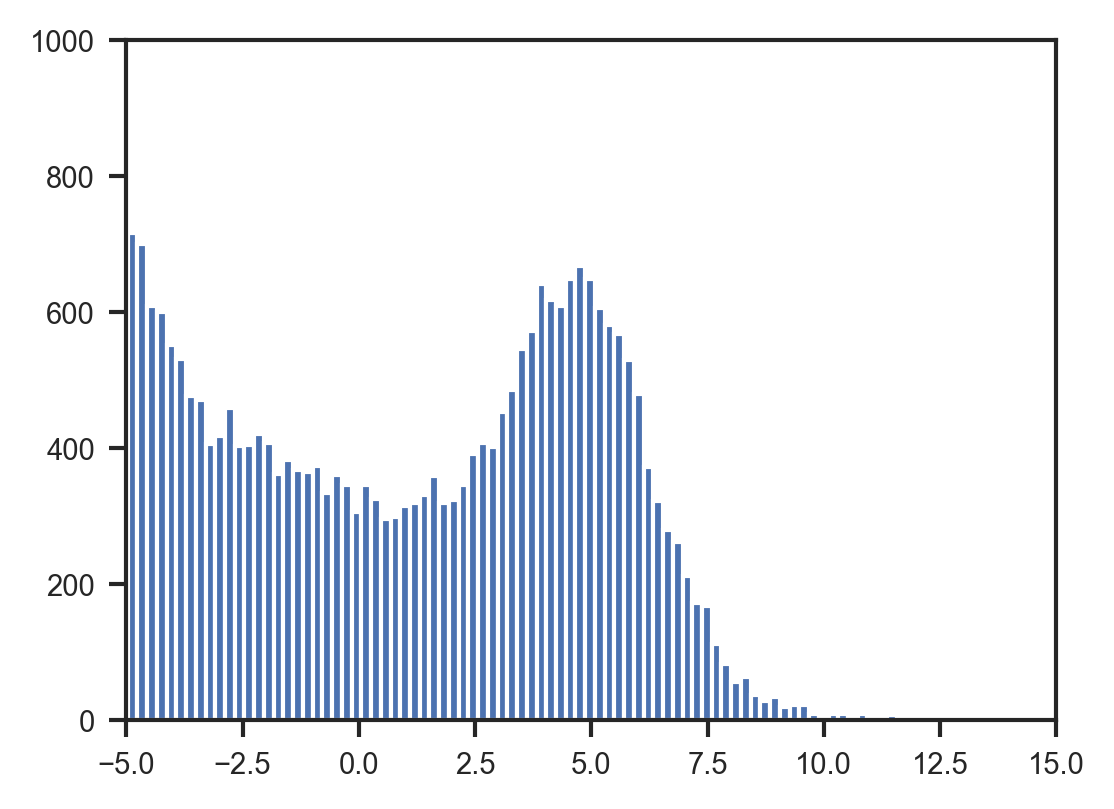

In [55]:
plt.hist( limma['AveExpr'],bins=100)
plt.xlim(-5,15)
plt.ylim(0,1000)
plt.show()


In [56]:
q_lim2=0.01
lfc_lim2=1
b_lim2=2.5

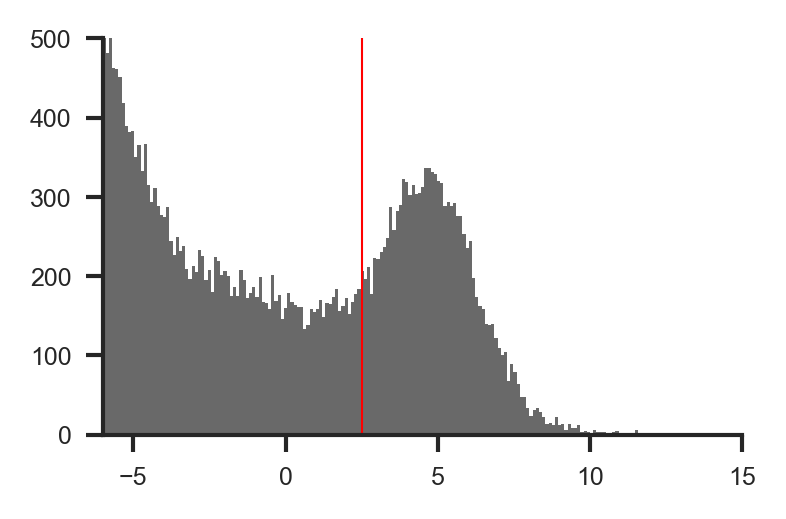

In [57]:
fig=plt.figure(figsize=(2.75,1.75))
ax=fig.add_subplot(111)
ax.hist( limma['AveExpr'],bins=200,color='dimgray',lw=0)
ax.axvline(x=b_lim2,color='red')
ax.set_xlim(-6,15)
ax.set_ylim(0,500)

ax.tick_params(labelsize=6)
ax.spines['right' ].set_visible(False)
ax.spines['top' ].set_visible(False)

In [58]:
limma_up=limma[(limma['adj.P.Val']<q_lim2)&(limma['logFC']>lfc_lim2)&(limma['AveExpr']>b_lim2)]
print(limma_up.shape)
limma_dn=limma[(limma['adj.P.Val']<q_lim2)&(limma['logFC']<-lfc_lim2)&(limma['AveExpr']>b_lim2)]
print(limma_dn.shape)

(168, 7)
(332, 7)


Text(0.5, 1.0, 'Limma')

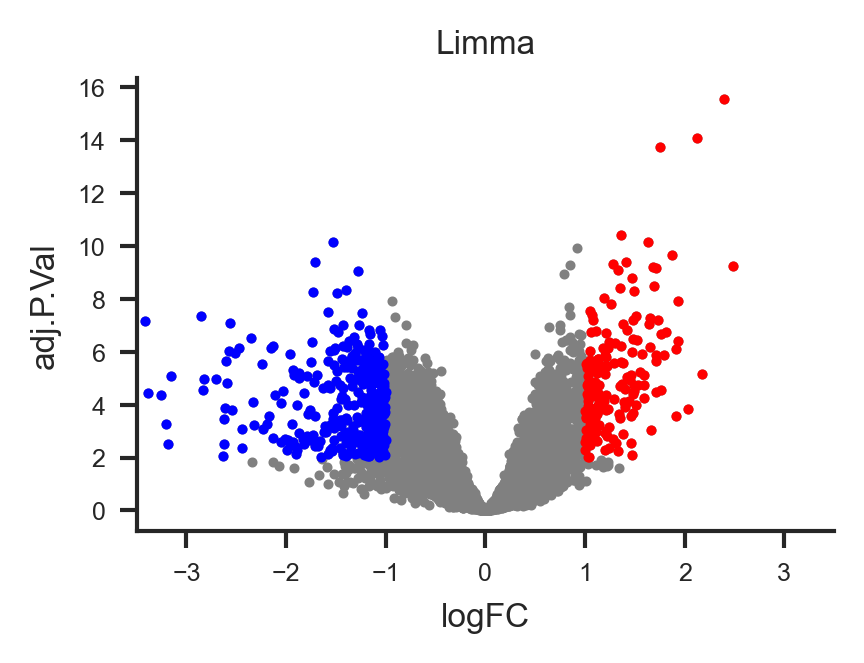

In [59]:
plt_df=limma.copy()
plt_df=plt_df[plt_df['AveExpr']>b_lim2]
#plt_df=plt_df[plt_df[cat]=='']
val1,val2='logFC','adj.P.Val'
#plt_df=plt_df[[val1,val2]].dropna()
x,y=plt_df[val1],-np.log10( plt_df[val2] )
fig=plt.figure(figsize=(3,2))
ax=fig.add_subplot(111)
ax.scatter(x,y,s=2,c='grey')
#ax.axhline(y=-np.log10(q_lim2)')

plt_df2=plt_df[(plt_df[val1]>lfc_lim2)&(plt_df[val2]<q_lim2)]
x1,y1=plt_df2[val1],-np.log10( plt_df2[val2] )
ax.scatter(x1,y1,s=2,c='red')

plt_df2=plt_df[(plt_df[val1]<-lfc_lim2)&(plt_df[val2]<q_lim2)]
x1,y1=plt_df2[val1],-np.log10( plt_df2[val2] )
ax.scatter(x1,y1,s=2,c='blue')

ax.set_xlabel(val1)
ax.set_ylabel(val2)

ax.set_xlim(-3.5,3.5)

ax.tick_params(labelsize=6)
ax.spines['right' ].set_visible(False)
ax.spines['top' ].set_visible(False)
ax.set_title('Limma')

In [60]:
deseq=pd.read_csv('./JGOG_282_C4_DESeq2.txt',sep='\t',index_col=0)
deseq=deseq[deseq.index.isin(dict_ensg_gs.keys())]
deseq['Gene_Symbol']=[dict_ensg_gs[x] for x in deseq.index]
deseq=deseq.dropna()
deseq

baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000176153   69.073302        3.414036  0.236767  14.419386   
ENSG00000198734  226.406913        3.621484  0.272311  13.299090   
ENSG00000173535   52.241718        2.968710  0.228593  12.986900   
ENSG00000120149  151.328696        4.589194  0.382956  11.983604   
ENSG00000245526   45.985327        3.943608  0.329335  11.974448   
...                     ...             ...       ...        ...   
ENSG00000222810    0.287821       -0.000182  1.029997  -0.000177   
ENSG00000253743    1.094860       -0.000116  0.711922  -0.000163   
ENSG00000258404    0.615367        0.000278  0.913336   0.000305   
ENSG00000269037    6.431832        0.000061  0.411228   0.000149   
ENSG00000121410  281.596412       -0.000001  0.241881  -0.000006   

                       pvalue          padj Gene_Symbol  
ENSG00000176153  3.908035e-47  1.899735e-42        GPX2  
ENSG00000198734  2.343028e-40  5.694846e-36          F5  
ENSG00000173535  1.451895e-38  2.352602e-34   TNFRSF10C  
ENSG00000120149  4.330799e-33  4.702104e-29        MSX2  
ENSG00000245526  4.836461e-33  4.702104e-29   LINC00461  
...                       ...           ...         ...  
ENSG00000222810  9.998587e-01  9.999415e-01    RNU2-68P  
ENSG00000253743  9.998697e-01  9.999415e-01    MARK2P11  
ENSG00000258404  9.997569e-01  9.999415e-01   LINC02320  
ENSG00000269037  9.998815e-01  9.999415e-01   LINC01838  
ENSG00000121410  9.999956e-01  9.999956e-01        A1BG  

[33431 rows x 7 columns]

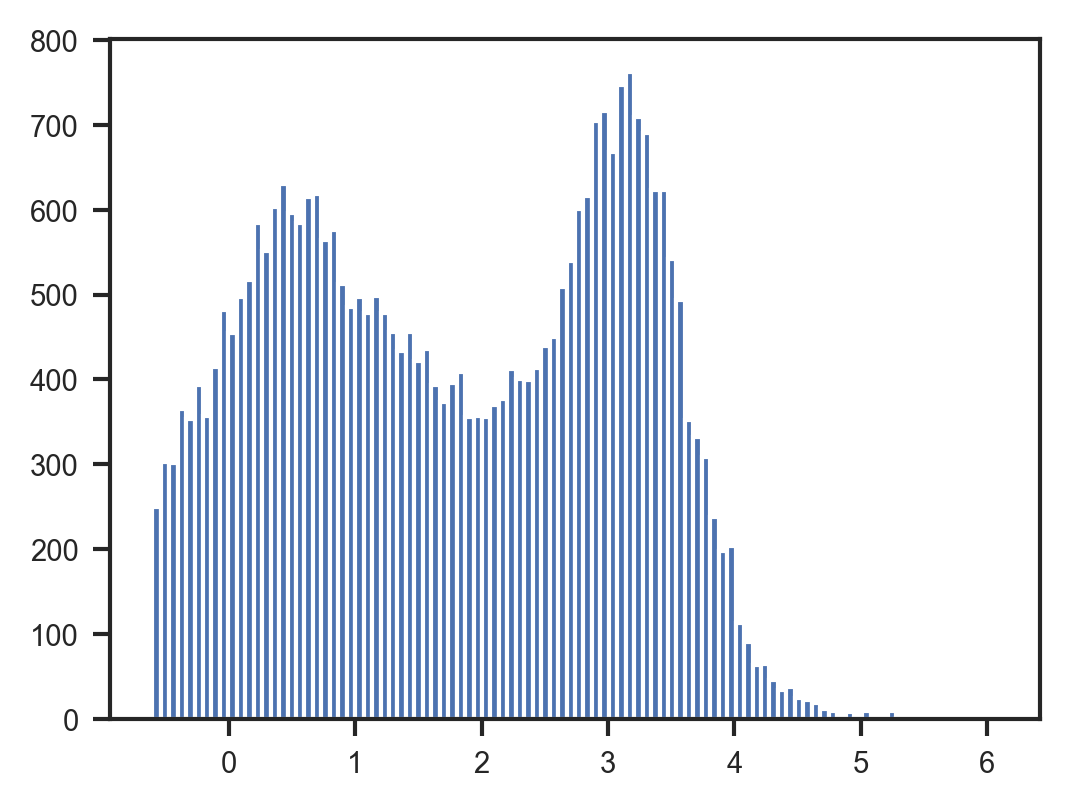

In [61]:
plt.hist( np.log10(deseq['baseMean']),bins=100)
plt.show()

In [62]:
q_lim=0.01
lfc_lim=1
b_lim=500

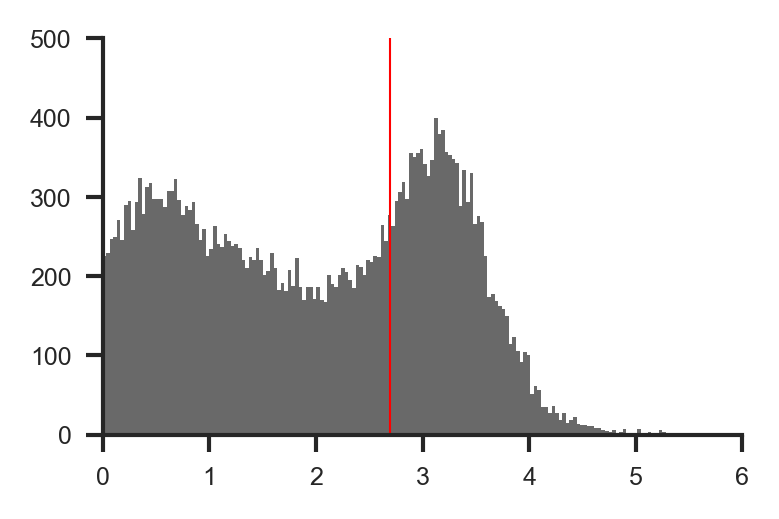

In [63]:
fig=plt.figure(figsize=(2.75,1.75))
ax=fig.add_subplot(111)
ax.hist( np.log10(deseq['baseMean']),bins=200,color='dimgray',lw=0)
ax.axvline(x=np.log10(500),color='red')
ax.set_xlim(0,6)
ax.set_ylim(0,500)
ax.tick_params(labelsize=6)
ax.spines['right' ].set_visible(False)
ax.spines['top' ].set_visible(False)

In [64]:
deseq_up=deseq[(deseq['padj']<q_lim)&(deseq['log2FoldChange']>lfc_lim)&(deseq['baseMean']>b_lim)]
print(deseq_up.shape)
deseq_dn=deseq[(deseq['padj']<q_lim)&(deseq['log2FoldChange']<-lfc_lim)&(deseq['baseMean']>b_lim)]
print(deseq_dn.shape)

(422, 7)
(216, 7)


Text(0.5, 1.0, 'DESeq')

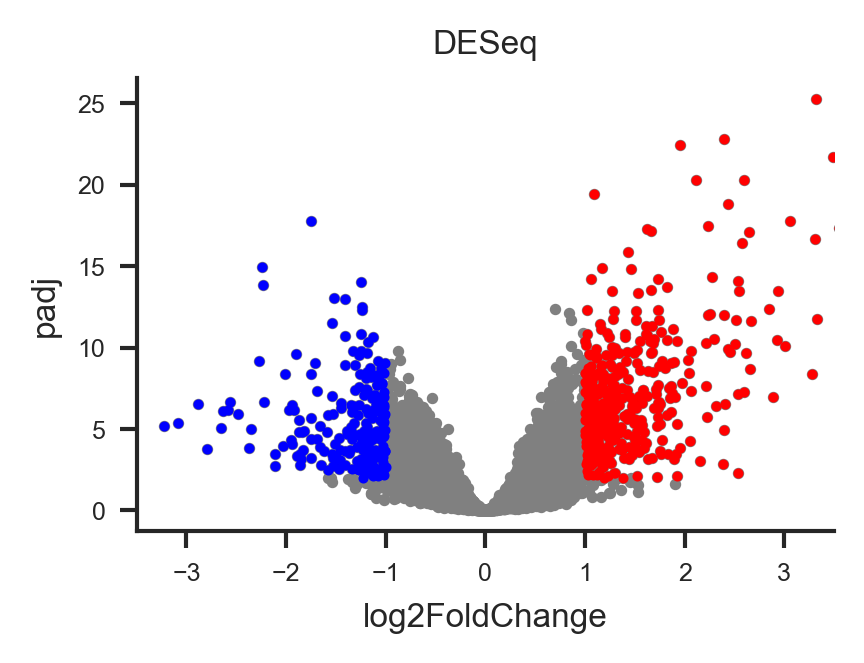

In [65]:
plt_df=deseq.copy()
plt_df=plt_df[plt_df['baseMean']>b_lim]
#plt_df=plt_df[plt_df[cat]=='']
val1,val2='log2FoldChange','padj'
plt_df=plt_df[[val1,val2]].dropna()
x,y=plt_df[val1],-np.log10( plt_df[val2] )

fig=plt.figure(figsize=(3,2))
ax=fig.add_subplot(111)
ax.scatter(x,y,s=3,c='grey')
plt_df2=plt_df[(plt_df[val1]>lfc_lim2)&(plt_df[val2]<q_lim2)]
x1,y1=plt_df2[val1],-np.log10( plt_df2[val2] )
ax.scatter(x1,y1,s=2,c='red')

plt_df2=plt_df[(plt_df[val1]<-lfc_lim2)&(plt_df[val2]<q_lim2)]
x1,y1=plt_df2[val1],-np.log10( plt_df2[val2] )
ax.scatter(x1,y1,s=2,c='blue')

ax.set_xlabel(val1)
ax.set_ylabel(val2)

ax.set_xlim(-3.5,3.5)

ax.tick_params(labelsize=6)
ax.spines['right' ].set_visible(False)
ax.spines['top' ].set_visible(False)
ax.set_title('DESeq')

# Intersect

In [66]:
u1=set( limma_up['Gene_Symbol'] )
u2=set( deseq_up['Gene_Symbol'] )
u3=u1&u2
len(u3)

147

In [67]:
d1=set( limma_dn['Gene_Symbol'])
d2=set( deseq_dn['Gene_Symbol'] )
d3=d1&d2
len(d3)

161

In [37]:
with open('JGOG_C4_signature_UP.txt', 'w') as fw:
    newline='\n'.join(sorted(u3))+'\n'
    fw.write(newline)
with open('JGOG_C4_signature_DN.txt', 'w') as fw:
    newline='\n'.join(sorted(d3))+'\n'
    fw.write(newline)

## View in JGOG data

In [19]:
exp=pd.read_csv('/Users/tshiro/Desktop/Projects/JGOG3025_HGS/JGOG3025_data/RNAseq/gene_expression_add/JGOG_HGS_RSEM_tpm_gs_merged_renamed.tsv'
               ,sep='\t',index_col=0)
exp=np.log1p(exp)

In [20]:
cluster=pd.read_csv('../../data/JGOG_282_assigned_cluster.txt',sep='\t',index_col=0)
cluster

cluster_c  cluster_c_int  C4
J302500696        C1              0   0
J302500531        C1              0   0
J302500773        C1              0   0
J302500466        C1              0   0
J302500593        C1              0   0
...              ...            ...  ..
J302500909        C4              3   1
J302500740        C4              3   1
J302500510        C4              3   1
J302500375        C4              3   1
J302500514        C4              3   1

[282 rows x 3 columns]

In [22]:
exp_order=exp.loc[:,cluster.index]
exp_order_z=stats.zscore(exp_order,axis=1)

In [23]:
exp_order_up=exp_order_z.reindex(index=u3).dropna()
exp_order_dn=exp_order_z.reindex(index=d3).dropna()

In [28]:
cluster['C4']

J302500696    0
J302500531    0
J302500773    0
J302500466    0
J302500593    0
             ..
J302500909    1
J302500740    1
J302500510    1
J302500375    1
J302500514    1
Name: C4, Length: 282, dtype: int64

In [30]:
exp_order_up

J302500696  J302500531  J302500773  J302500466  J302500593  \
Hugo_Symbol                                                               
ABCA6         -0.465689    0.941199    0.782392   -0.567348    0.669475   
PARM1         -0.683387   -0.734812   -0.345930   -0.485985   -0.083840   
NAV3          -0.937068   -0.061653   -0.298712   -0.623860    1.281235   
GNG2          -0.548944   -0.092198    0.174379    0.675086    0.209683   
C7             0.558242    0.401827    1.656770   -1.128087    0.051443   
...                 ...         ...         ...         ...         ...   
RGS2          -1.274392    0.423701   -0.069328    0.575955   -0.091608   
CPXM2         -0.936906   -0.003664    0.124581   -0.143551   -0.479009   
ECM2          -1.020537    0.663978    1.010445   -0.055752    1.425875   
BICC1         -0.988595    0.376576    0.110596    0.345207    1.632841   
KLF4          -1.173057   -0.836542   -0.513833   -0.589461   -0.465054   

             J302500177  J302500164  J302500369  J302500357  J302500220  \
Hugo_Symbol                                                               
ABCA6          0.911856   -0.958490    1.688162    0.532575    0.299154   
PARM1         -0.345930    0.326520   -0.042277    0.380862   -0.300646   
NAV3           0.661453    0.554909    2.051253    2.070075    0.395875   
GNG2           0.928909    0.421804    1.845483    0.596136    0.782659   
C7             1.455812   -1.042518    1.111472   -0.173286   -1.107400   
...                 ...         ...         ...         ...         ...   
RGS2           0.420602    0.654111    1.456517   -0.160683    0.525126   
CPXM2         -0.684891    0.929458    2.879898   -0.035455    1.879936   
ECM2           1.133879   -0.274584    0.560531    1.769985   -0.129196   
BICC1          0.827269    1.822312    1.526525    1.400300    1.495711   
KLF4          -0.589461    0.836575    2.246376   -0.750519   -0.576643   

             J302500859  J302500053  J302500775  J302500657  J302500298  \
Hugo_Symbol                                                               
ABCA6         -0.043031   -0.341785   -0.786635    0.376691   -0.689855   
PARM1          0.326520   -0.083840   -0.787124    0.271187   -0.683387   
NAV3           0.778786   -0.197668   -0.693310   -0.623860   -1.093359   
GNG2           0.402859   -0.580023   -0.654502    0.223630   -0.508252   
C7            -0.137942    0.158876    1.292213    1.238997   -1.067761   
...                 ...         ...         ...         ...         ...   
RGS2          -0.243380   -1.006392    0.003846    0.451280   -0.268673   
CPXM2         -0.241336    0.512867   -0.489754    0.058017   -0.995649   
ECM2           1.221722    0.372905   -0.786996    0.328720   -0.710646   
BICC1          0.906346   -0.661790   -0.839878    0.360954   -0.584675   
KLF4          -0.615363   -0.206794   -0.227893    0.718589   -0.764585   

             J302500318  J302500774  J302500438  J302500615  J302500791  \
Hugo_Symbol                                                               
ABCA6         -0.552523    0.002898   -0.409722   -0.288966   -0.721625   
PARM1         -0.583081   -0.256027   -0.300646   -0.708991   -0.683387   
NAV3          -0.988271    0.835787   -0.623860    0.492297   -0.197668   
GNG2          -0.209801    0.318593   -0.244731   -0.390981   -0.896455   
C7            -1.061365   -0.944284    0.904029   -1.107400   -1.121124   
...                 ...         ...         ...         ...         ...   
RGS2           0.317594    0.344074   -0.819474   -0.284075    0.439091   
CPXM2         -0.385537    0.573555    0.610967   -0.760116   -0.624890   
ECM2          -0.475253    0.861873   -0.315197    0.182030   -0.948988   
BICC1         -0.302998    1.290275   -1.067336    0.611187   -0.597322   
KLF4          -0.477131   -0.405811   -0.303667   -1.037657   -0.807428   

             J302500431  J302500073  J302500524  J302500422  J302500671  \
Hugo_Symbol                       

In [32]:
m1=np.mean(exp_order_up.loc[:,cluster['C4']==0],axis=1)
m2=np.mean(exp_order_up.loc[:,cluster['C4']==1],axis=1)
order_up=(m1-m2).sort_values(ascending=True).index
order_up

Index(['KLF4', 'DUSP4', 'CDKN1A', 'PARM1', 'MAPK10', 'TFPI', 'CR1', 'TTN',
       'ID2', 'MYH11',
       ...
       'DMD', 'PDGFRA', 'MEG3', 'PRICKLE2', 'PTGIS', 'SERPINF1', 'RGS5',
       'PDLIM3', 'FOS', 'GPC6'],
      dtype='object', name='Hugo_Symbol', length=146)

Text(89.08333333333333, 0.5, '')

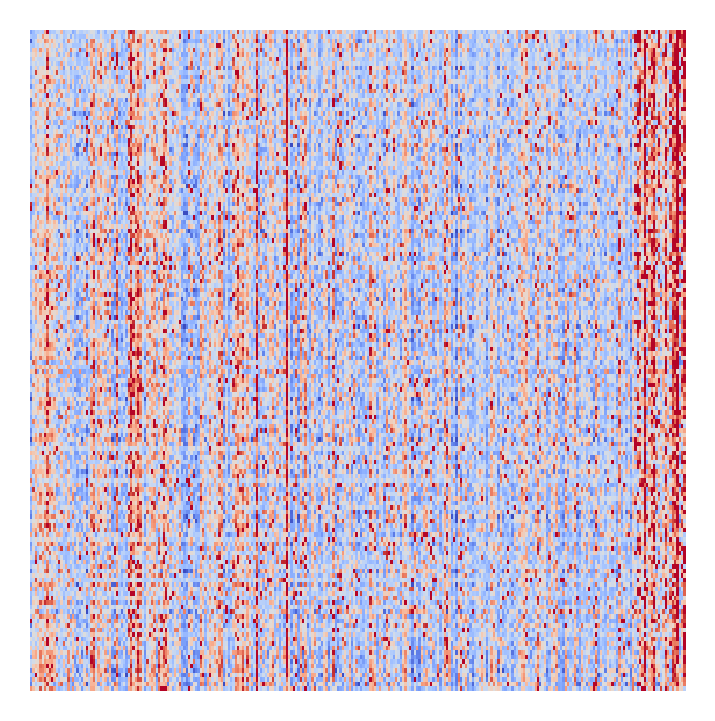

In [33]:
sns_df=exp_order_up.loc[order_up,:]
n,w=sns_df.shape[0],sns_df.shape[1]
height=n/50
width=w/100
fig=plt.figure(figsize=(width,height))
ax=fig.add_subplot(111)
sns.heatmap(sns_df,vmin=-2,vmax=2,ax=ax, xticklabels=0, yticklabels=0,
            cmap='coolwarm',cbar=False)
ax.set_ylabel('')

In [34]:
m1=np.mean(exp_order_dn.loc[:,cluster['C4']==0],axis=1)
m2=np.mean(exp_order_dn.loc[:,cluster['C4']==1],axis=1)
order_dn=(m1-m2).sort_values(ascending=False).index

Text(89.08333333333333, 0.5, '')

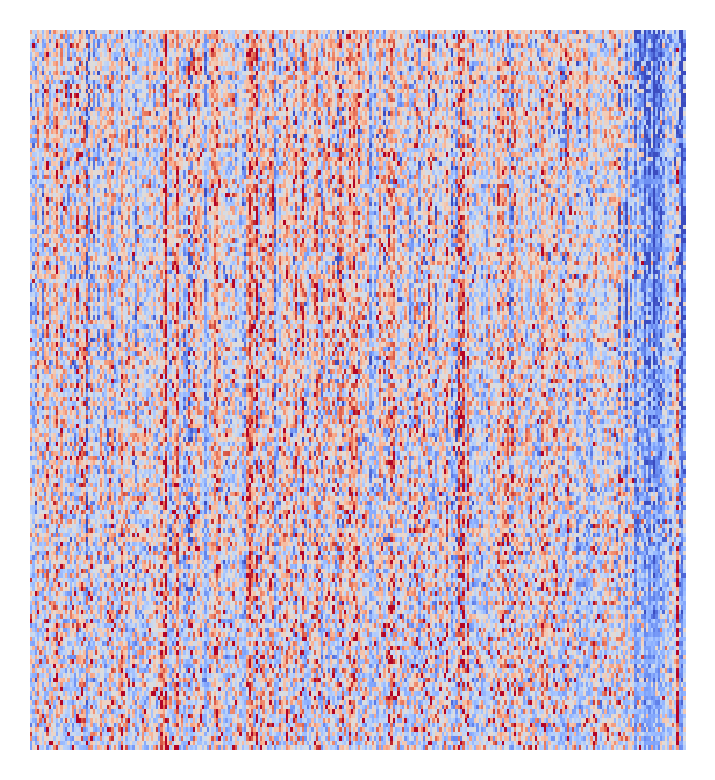

In [35]:
sns_df=exp_order_dn.loc[order_dn,:]
n,w=sns_df.shape[0],sns_df.shape[1]
height=n/50
width=w/100
fig=plt.figure(figsize=(width,height))
ax=fig.add_subplot(111)
sns.heatmap(sns_df,vmin=-2,vmax=2,ax=ax, xticklabels=0, yticklabels=0,
            cmap='coolwarm',cbar=False)
ax.set_ylabel('')

<AxesSubplot:>

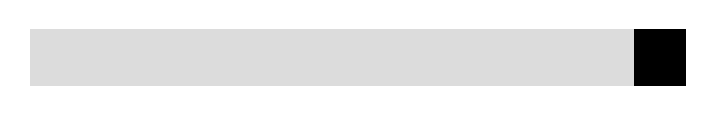

In [36]:
sns_df=cluster[['C4']].T
fig=plt.figure(figsize=(width,0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df,vmin=-0.3,vmax=1,xticklabels=0, yticklabels=0,cmap='Greys',cbar=False,ax=ax)

In [ ]:
c_tcga=pd.read_csv('../../CNV/TCGA_validation/TCGA-OV_anno_cluster_20230929.txt',sep='\t',index_col=0)
c_tcga.shape

(555, 332)

In [ ]:
c_ucec['OV']=(c_ucec.index.isin(c_tcga.index)).astype(int)

In [ ]:
c_ucec=c_ucec[c_ucec['OV']==0]

In [ ]:
sel_samples=set(c_ucec.index)&set(exp_ov_ucec.columns)
len(sel_samples)

183

In [ ]:
c_ucec=c_ucec[c_ucec.index.isin(sel_samples)]
c_ucec['C4'].sum()

33

In [ ]:
pd.crosstab(c_ucec['cluster_c'],c_ucec['P4'])

P4         C1  C2  C3  C4  UD
cluster_c                    
C1          1   0   0   1   5
C2          1  88   1   0   8
C3          0   1  24   6   8
C4          0   0   0  33   0
UK          0   0   0   4   2

In [ ]:
c_ucec.sort_values(by=['C4','pC4','OV'],ascending=False)

P3  P4  cluster_5 cluster_c  pC4  C4  OV  order    anno
TCGA-BG-A0MA  C4  C4          3        C4    1   1   0      2   UT-C4
TCGA-EO-A3L0  C4  C4          3        C4    1   1   0      2   UT-C4
TCGA-BG-A220  C4  C4          3        C4    1   1   0      2   UT-C4
TCGA-BS-A0T9  C4  C4          3        C4    1   1   0      2   UT-C4
TCGA-AJ-A3OK  C4  C4          3        C4    1   1   0      2   UT-C4
...           ..  ..        ...       ...  ...  ..  ..    ...     ...
TCGA-E6-A1LZ  C2  C2          1        C2    0   0   0      5  UT-nC4
TCGA-B5-A11I  C2  C2          1        C2    0   0   0      5  UT-nC4
TCGA-BG-A0M6  C2  C2          1        C2    0   0   0      5  UT-nC4
TCGA-B5-A0K8  C3  C3          0        C3    0   0   0      5  UT-nC4
TCGA-AX-A0IW  C3  UD          1        C2    0   0   0      5  UT-nC4

[183 rows x 9 columns]

In [ ]:
order_number=[]
anno=[]
for idx in c_ucec.index:
    if c_ucec.loc[idx,'OV']==1:
        if c_ucec.loc[idx,'C4']==1:
            order_number.append(0)
            anno.append('OV-C4')
        elif c_ucec.loc[idx,'pC4']==1:
            order_number.append(1)
            anno.append('OV-pC4')
        else:
            order_number.append(4)
            anno.append('OV-nC4')
    else:
        if c_ucec.loc[idx,'C4']==1:
            order_number.append(2)
            anno.append('UT-C4')
        elif c_ucec.loc[idx,'pC4']==1:
            order_number.append(3)
            anno.append('UT-pC4')
        else:
            order_number.append(5)
            anno.append('UT-nC4')

c_ucec['order']=order_number
c_ucec['anno']=anno

In [ ]:
c_ucec=c_ucec.sort_values(['order'])

In [ ]:
exp_ov_ucec_order=exp_ov_ucec.loc[:,c_ucec.index]
exp_ov_ucec_order

TCGA-BG-A0MA  TCGA-B5-A11X  TCGA-AX-A1CC  TCGA-BG-A0MS  \
5S_rRNA           1.416702      0.676764      0.000000      0.000000   
5_8S_rRNA         0.597407      0.000000      0.000000      0.000000   
7SK               0.348471      0.000000      0.662430      0.393662   
A1BG              0.117161      0.379532      0.254720      0.035271   
A1BG-AS1          0.340108      0.971271      0.893759      0.324617   
...                    ...           ...           ...           ...   
ZZEF1             2.116713      2.536202      3.277722      2.253773   
ZZZ3              2.816809      1.748748      2.870231      2.512125   
hsa-mir-1253      0.000000      0.000000      0.000000      0.000000   
hsa-mir-423       0.000000      0.000000      0.000000      0.000000   
snoZ196           1.884627      0.000000      0.000000      0.000000   

              TCGA-D1-A168  TCGA-AJ-A3NE  TCGA-D1-A16G  TCGA-FI-A2CX  \
5S_rRNA           0.000000      0.525083      1.169319      0.000000   
5_8S_rRNA         0.000000      0.000000      0.598122      0.000000   
7SK               0.000000      0.000000      0.653054      0.000000   
A1BG              0.000000      0.035946      0.060342      0.162544   
A1BG-AS1          0.313496      0.141413      0.104990      1.058623   
...                    ...           ...           ...           ...   
ZZEF1             2.665852      2.435103      2.790515      2.642153   
ZZZ3              1.704112      2.941836      2.353145      2.246216   
hsa-mir-1253      0.000000      0.000000      0.000000      0.000000   
hsa-mir-423       0.000000      0.000000      0.000000      0.000000   
snoZ196           0.000000      0.600209      0.874760      1.015955   

              TCGA-D1-A3DA  TCGA-BG-A0MK  TCGA-AX-A3GB  TCGA-AX-A2H7  \
5S_rRNA           0.793761      1.370267      0.956280      1.162995   
5_8S_rRNA         0.000000      0.000000      0.000000      0.000000   
7SK               0.000000      0.273837      0.000000      0.000000   
A1BG              0.017250      0.144706      0.088102      0.206282   
A1BG-AS1          0.187889      0.987159      0.310275      0.144187   
...                    ...           ...           ...           ...   
ZZEF1             2.147661      2.579110      1.702035      2.054598   
ZZZ3              2.787945      2.425289      2.203924      2.447715   
hsa-mir-1253      0.000000      0.000000      0.000000      0.000000   
hsa-mir-423       0.000000      0.000000      0.000000      0.000000   
snoZ196           0.578746      0.628235      0.524492      1.371409   

              TCGA-DF-A2KY  TCGA-D1-A15X  TCGA-AJ-A3NC  TCGA-D1-A1O8  \
5S_rRNA           0.494452      0.000000      0.000000      2.870175   
5_8S_rRNA         0.000000      0.000000      0.000000      0.000000   
7SK               0.000000      0.000000      0.240669      0.000000   
A1BG              0.253246      0.107239      0.080658      0.303432   
A1BG-AS1          0.555895      0.792042      0.181655      1.499869   
...                    ...           ...           ...           ...   
ZZEF1             1.791959      2.477848      2.290462      2.152831   
ZZZ3              2.005203      2.366874      3.007058      2.058473   
hsa-mir-1253      0.000000      0.000000      0.000000      0.000000   
hsa-mir-423       0.000000      0.000000      0.000000      0.000000   
snoZ196           0.566336      1.265228      0.562583      0.000000   

              TCGA-AX-A0IZ  TCGA-D1-A175  TCGA-EO-A3L0  TCGA-BG-A220  \
5S_rRNA           1.488309      0.000000      0.463545      0.000000   
5_8S_rRNA         0.000000      0.000000      0.000000      0.000000   
7SK               0.000000      0.000000      0.000000      0.444750   
A1BG              0.000000      0.632548      0.015480      0.034015   
A1BG-AS1          0.217850      1.829312      0.154179      0.427292   
...                    ...           ...           ...           ...   
ZZEF1             1.886494      3.110185      2.32

In [ ]:
exp_ov_ucec_order_z=stats.zscore(exp_ov_ucec_order,axis=1)


In [ ]:
exp_ov_ucec_order_up=exp_ov_ucec_order_z.reindex(index=u3).dropna()
exp_ov_ucec_order_dn=exp_ov_ucec_order_z.reindex(index=d3).dropna()

In [ ]:
(c_ucec['order'].isin([4,5])).sum()

139

In [ ]:
exp_ov_ucec_order_up.shape[1]

183

In [ ]:
m1=np.mean(exp_ov_ucec_order_up.iloc[:,0:(183-139)],axis=1)
m2=np.mean(exp_ov_ucec_order_up.iloc[:,(183-139):],axis=1)
order_up=(m1-m2).sort_values(ascending=False).index

In [ ]:
(m1-m2).sort_values(ascending=True)

GSTM3    -0.498649
CPXM2    -0.495598
PAPLN    -0.424124
MEG8     -0.339838
EFEMP1   -0.248961
            ...   
TLR4      0.951646
CRYL1     0.963845
CD44      0.995147
SORBS2    1.197750
CDKN1A    1.407756
Length: 147, dtype: float64

<AxesSubplot:>

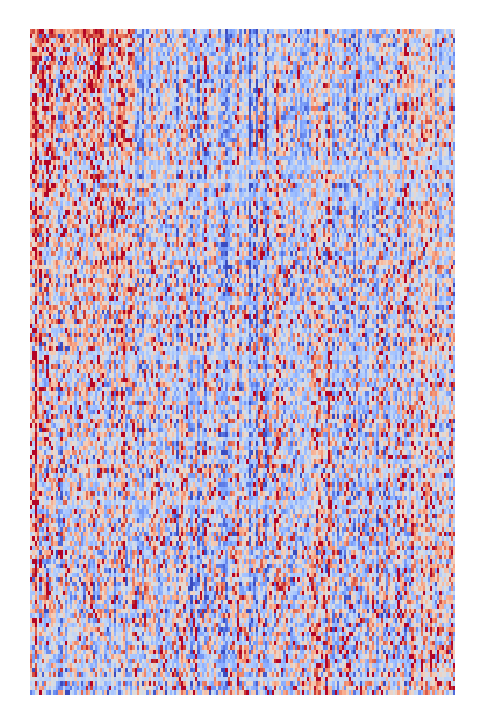

In [ ]:
sns_df=exp_ov_ucec_order_up.loc[order_up,:]
n,w=sns_df.shape[0],sns_df.shape[1]
height=n/50
width=w/100
fig=plt.figure(figsize=(width,height))
ax=fig.add_subplot(111)
sns.heatmap(sns_df,vmin=-1.75,vmax=1.75,xticklabels=0, yticklabels=0,cmap='coolwarm',cbar=False,ax=ax)

In [327]:
m1=np.mean(exp_tcga_order_dn.iloc[:,0:(183-139)],axis=1)
m2=np.mean(exp_tcga_order_dn.iloc[:,(183-139):],axis=1)
order_dn=(m1-m2).sort_values(ascending=False).index

<AxesSubplot:>

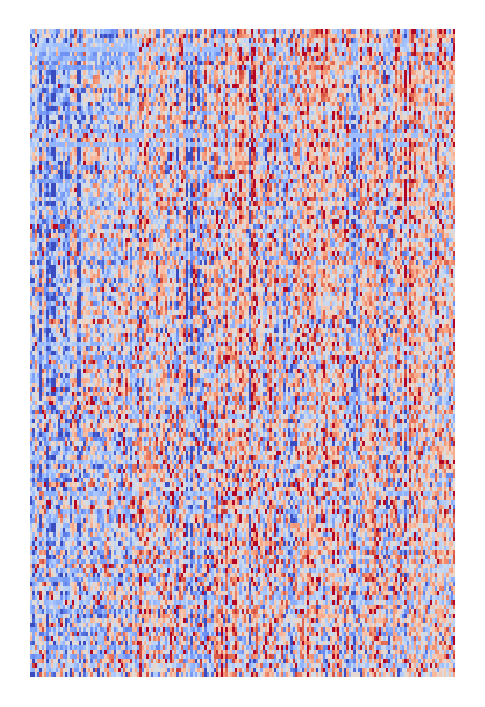

In [328]:
sns_df=exp_ov_ucec_order_dn.loc[order_dn,:]
n,w=sns_df.shape[0],sns_df.shape[1]
height=n/50
width=w/100
fig=plt.figure(figsize=(width,height))
ax=fig.add_subplot(111)
sns.heatmap(sns_df,vmin=-1.75,vmax=1.75,xticklabels=0, yticklabels=0,cmap='coolwarm',cbar=False,ax=ax)

In [329]:
pd.get_dummies(c_ucec_order[['OV','C4','pC4']])

OV  C4  pC4
TCGA-61-1721   1   1    1
TCGA-13-1485   1   1    1
TCGA-24-2038   1   1    1
TCGA-61-2095   1   1    1
TCGA-24-1565   1   1    1
TCGA-13-1477   1   1    1
TCGA-B5-A11X   0   1    1
TCGA-AJ-A2QL   0   1    1
TCGA-BG-A220   0   1    1
TCGA-AJ-A5DV   0   1    1
TCGA-AP-A05O   0   1    1
TCGA-AJ-A3OK   0   1    1
TCGA-EO-A3L0   0   1    1
TCGA-AJ-A3BK   0   1    1
TCGA-A5-A1OK   0   1    1
TCGA-D1-A175   0   1    1
TCGA-D1-A1O8   0   1    1
TCGA-AJ-A3NE   0   1    1
TCGA-BS-A0T9   0   1    1
TCGA-BG-A0MA   0   1    1
TCGA-AX-A0IZ   0   1    1
TCGA-AJ-A3NC   0   1    1
TCGA-D1-A15X   0   1    1
TCGA-DF-A2KY   0   1    1
TCGA-BG-A0MK   0   1    1
TCGA-AX-A3GB   0   1    1
TCGA-AX-A1CC   0   1    1
TCGA-D1-A3DA   0   1    1
TCGA-FI-A2CX   0   1    1
TCGA-D1-A16G   0   1    1
TCGA-D1-A168   0   1    1
TCGA-BG-A0MS   0   1    1
TCGA-AX-A2H7   0   1    1
TCGA-BG-A2AD   0   1    1
TCGA-AX-A1CN   0   1    1
TCGA-B5-A11R   0   1    1
TCGA-AX-A2HH   0   1    1
TCGA-BG-A2AE   0   1    1
TCGA-B5-A0JX   0   1    1
TCGA-10-0934   1   0    1
TCGA-61-2092   1   0    1
TCGA-61-1995   1   0    1
TCGA-25-1316   1   0    1

<AxesSubplot:>

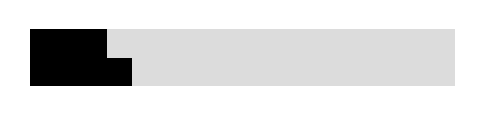

In [331]:
sns_df=pd.get_dummies(c_ucec[['C4','pC4']]).T
fig=plt.figure(figsize=(width,0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df,vmin=-0.3,vmax=1,xticklabels=0, yticklabels=0,cmap='Greys',cbar=False,ax=ax)

In [334]:
exp_ucec=pd.read_csv('/Users/tshiro/Desktop/DRY/TCGA_analysis/UCEC/GDC2023/gexp/TCGA_UCEC_557_tpm_gs_merged.tsv.gz'
                     ,sep='\t',index_col=0)
exp_ucec=np.log1p(exp_ucec)

In [335]:
exp_ov_ucec=pd.concat([exp_tcga,exp_ucec],axis=1)
exp_ov_ucec.shape

(59427, 978)

In [336]:
c_ucec=pd.read_csv('../../CNV/TCGA_validation/TCGA-UCEC_anno_cluster_20230929.tsv',sep='\t',index_col=0)
c_ucec=c_ucec.loc[~c_ucec['P4'].isna(),:]
c_ucec['pC4']=(c_ucec['P4']=='C4').astype(int)
c_ucec['C4']=(c_ucec['cluster_c']=='C4').astype(int)
c_ucec.sort_values(by=['pC4','C4'])

P3  P4  cluster_5 cluster_c  pC4  C4
TCGA-24-1551  C2  C2          0        C3    0   0
TCGA-42-2588  C2  C2          0        C3    0   0
TCGA-20-0987  C2  C2          0        C3    0   0
TCGA-61-2000  C2  C2          0        C3    0   0
TCGA-25-1322  C2  C2          0        C3    0   0
...           ..  ..        ...       ...  ...  ..
TCGA-B5-A11R  C4  C4          3        C4    1   1
TCGA-AX-A2HH  C4  C4          3        C4    1   1
TCGA-BG-A2AE  C4  C4          3        C4    1   1
TCGA-13-1477  C4  C4          3        C4    1   1
TCGA-B5-A0JX  C4  C4          3        C4    1   1

[739 rows x 6 columns]

In [337]:
c_tcga=pd.read_csv('../../CNV/TCGA_validation/TCGA-OV_anno_cluster_20230929.txt',sep='\t',index_col=0)
c_tcga.shape

(555, 332)

In [338]:
c_ucec['OV']=(c_ucec.index.isin(c_tcga.index)).astype(int)

In [339]:
c_ucec=c_ucec[c_ucec['OV']==1]

In [340]:
sel_samples=set(c_ucec.index)&set(exp_ov_ucec.columns)
len(sel_samples)

399

In [341]:
c_ucec=c_ucec[c_ucec.index.isin(sel_samples)]
c_ucec['C4'].sum()

6

In [342]:
pd.crosstab(c_ucec['cluster_c'],c_ucec['P4'])

P4         C1   C2   C3  C4  UD
cluster_c                      
C1         18    0    0   2  13
C2         11  168    9   2  47
C3          0    5  109   3   5
C4          0    0    0   6   0
UK          0    0    0   1   0

In [343]:
c_ucec.sort_values(by=['C4','pC4','OV'],ascending=False)

P3  P4  cluster_5 cluster_c  pC4  C4  OV
TCGA-61-1721  C4  C4          3        C4    1   1   1
TCGA-13-1485  C4  C4          3        C4    1   1   1
TCGA-24-2038  C4  C4          3        C4    1   1   1
TCGA-61-2095  C4  C4          3        C4    1   1   1
TCGA-24-1565  C4  C4          3        C4    1   1   1
...           ..  ..        ...       ...  ...  ..  ..
TCGA-13-1408  C1  C1          1        C2    0   0   1
TCGA-09-0367  C2  C2          1        C2    0   0   1
TCGA-13-1495  C1  C1          1        C2    0   0   1
TCGA-13-0891  C1  C1          1        C2    0   0   1
TCGA-31-1953  C1  C1          1        C2    0   0   1

[399 rows x 7 columns]

In [344]:
order_number=[]
anno=[]
for idx in c_ucec.index:
    if c_ucec.loc[idx,'OV']==1:
        if c_ucec.loc[idx,'C4']==1:
            order_number.append(0)
            anno.append('OV-C4')
        elif c_ucec.loc[idx,'pC4']==1:
            order_number.append(1)
            anno.append('OV-pC4')
        else:
            order_number.append(4)
            anno.append('OV-nC4')
    else:
        if c_ucec.loc[idx,'C4']==1:
            order_number.append(2)
            anno.append('UT-C4')
        elif c_ucec.loc[idx,'pC4']==1:
            order_number.append(3)
            anno.append('UT-pC4')
        else:
            order_number.append(5)
            anno.append('UT-nC4')

c_ucec['order']=order_number
c_ucec['anno']=anno

In [345]:
c_ucec=c_ucec.sort_values(['order'])

In [358]:
c_ucec

P3  P4  cluster_5 cluster_c  pC4  C4  OV  order    anno
TCGA-61-1721  C4  C4          3        C4    1   1   1      0   OV-C4
TCGA-13-1485  C4  C4          3        C4    1   1   1      0   OV-C4
TCGA-24-2038  C4  C4          3        C4    1   1   1      0   OV-C4
TCGA-61-2095  C4  C4          3        C4    1   1   1      0   OV-C4
TCGA-24-1565  C4  C4          3        C4    1   1   1      0   OV-C4
...           ..  ..        ...       ...  ...  ..  ..    ...     ...
TCGA-23-1122  C1  UD          2        C1    0   0   1      4  OV-nC4
TCGA-57-1582  C1  C1          2        C1    0   0   1      4  OV-nC4
TCGA-25-1871  C1  C1          2        C1    0   0   1      4  OV-nC4
TCGA-61-2094  C4  UD          0        C3    0   0   1      4  OV-nC4
TCGA-31-1953  C1  C1          1        C2    0   0   1      4  OV-nC4

[399 rows x 9 columns]

In [359]:
exp_ov_ucec_order=exp_ov_ucec.loc[:,c_ucec.index]
exp_ov_ucec_order

TCGA-61-1721  TCGA-13-1485  TCGA-24-2038  TCGA-61-2095  \
5S_rRNA           2.230197      0.000000      1.489212      0.488703   
5_8S_rRNA         3.107050      0.335186      3.284401      0.553943   
7SK               0.762067      0.217850      0.904421      0.141326   
A1BG              0.051548      0.178565      0.044400      0.187558   
A1BG-AS1          0.561272      1.003825      0.216884      0.647784   
...                    ...           ...           ...           ...   
ZZEF1             2.316951      2.102535      2.248699      2.665922   
ZZZ3              2.779006      2.236851      2.652164      3.213574   
hsa-mir-1253      0.000000      0.000000      0.000000      0.000000   
hsa-mir-423       0.000000      0.000000      0.000000      0.000000   
snoZ196           0.000000      0.854926      0.000000      0.987755   

              TCGA-24-1565  TCGA-13-1477  TCGA-24-1413  TCGA-24-1416  \
5S_rRNA           0.707346      0.744220      1.022307      1.884293   
5_8S_rRNA         3.763015      4.853634      0.000000      2.887144   
7SK               0.695594      0.995398      0.000000      0.000000   
A1BG              0.070179      0.082317      0.032080      0.015283   
A1BG-AS1          0.255262      0.130853      0.367971      0.569906   
...                    ...           ...           ...           ...   
ZZEF1             2.118951      1.004118      2.006871      1.653589   
ZZZ3              2.252249      1.626846      2.897281      2.291696   
hsa-mir-1253      0.000000      0.000000      0.000000      0.000000   
hsa-mir-423       0.000000      0.000000      0.000000      0.000000   
snoZ196           0.597022      0.000000      1.163026      0.000000   

              TCGA-29-1710  TCGA-10-0926  TCGA-61-1995  TCGA-61-2092  \
5S_rRNA           0.840230      1.149432      0.930746      0.736925   
5_8S_rRNA         0.427357      5.454052      0.449035      2.847018   
7SK               0.261595      2.176716      0.942855      0.000000   
A1BG              0.029850      0.031789      0.186148      0.000000   
A1BG-AS1          0.759450      0.129009      0.782622      0.033628   
...                    ...           ...           ...           ...   
ZZEF1             2.524256      1.647716      2.386513      2.302115   
ZZZ3              2.842709      2.095192      3.283734      3.158106   
hsa-mir-1253      0.000000      0.000000      0.000000      0.000000   
hsa-mir-423       0.000000      0.000000      0.000000      0.000000   
snoZ196           0.374181      0.000000      0.394674      0.831865   

              TCGA-10-0934  TCGA-25-1316  TCGA-36-1581  TCGA-30-1853  \
5S_rRNA           0.715104      0.000000      0.938326      1.803836   
5_8S_rRNA         3.815878      2.788542      0.604261      3.784651   
7SK               0.076035      0.439544      0.501866      0.229126   
A1BG              0.019312      0.000000      0.249902      0.105531   
A1BG-AS1          0.034112      0.149798      0.734433      0.292147   
...                    ...           ...           ...           ...   
ZZEF1             1.704766      2.009837      2.536217      1.878671   
ZZZ3              1.830900      2.678766      2.774225      2.431849   
hsa-mir-1253      0.000000      0.000000      0.000000      0.000000   
hsa-mir-423       0.000000      0.000000      0.000000      0.000000   
snoZ196           0.930273      0.412573      0.882693      0.000000   

              TCGA-20-1683  TCGA-13-0730  TCGA-24-2019  TCGA-61-1743  \
5S_rRNA           0.512105      1.734413      0.543312      0.871377   
5_8S_rRNA         5.924863      5.331906      3.142211      0.187392   
7SK               0.265130      0.742604      0.518377      0.000000   
A1BG              0.580874      0.127601      0.076220      0.193014   
A1BG-AS1          1.262345      0.513961      0.446671      0.630580   
...                    ...           ...           ...           ...   
ZZEF1             3.133396      2.175638      2.14

In [360]:
exp_ov_ucec_order_z=stats.zscore(exp_ov_ucec_order,axis=1)


In [361]:
exp_ov_ucec_order_up=exp_ov_ucec_order_z.reindex(index=u3).dropna()
exp_ov_ucec_order_dn=exp_ov_ucec_order_z.reindex(index=d3).dropna()

In [362]:
(c_ucec['order'].isin([4,5])).sum()

385

In [363]:
exp_ov_ucec_order_up.shape[1]

399

In [365]:
m1=np.mean(exp_ov_ucec_order_up.iloc[:,0:14],axis=1)
m2=np.mean(exp_ov_ucec_order_up.iloc[:,14:],axis=1)
order_up=(m1-m2).sort_values(ascending=False).index

In [366]:
(m1-m2).sort_values(ascending=False)

SORBS2     1.233918
LRRK2      1.073181
ID2        0.987920
PSD3       0.955719
ABCC3      0.946637
             ...   
HCLS1     -0.302920
EPB41L3   -0.347570
CSF3R     -0.402716
CD36      -0.413575
FBLN1     -0.420295
Length: 147, dtype: float64

<AxesSubplot:>

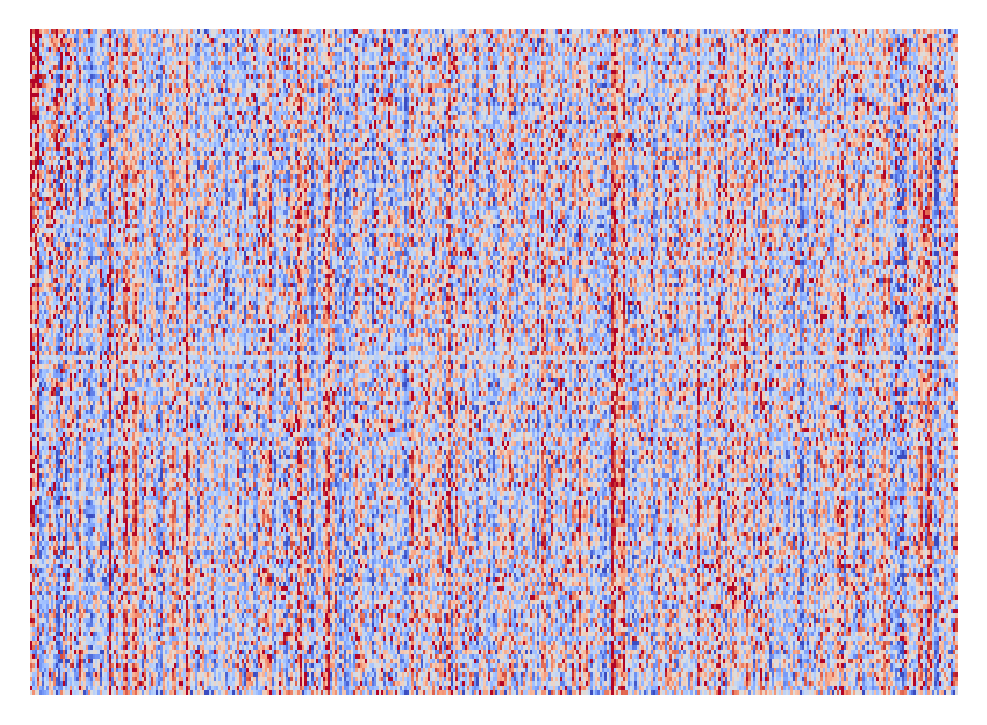

In [367]:
sns_df=exp_ov_ucec_order_up.loc[order_up,:]
n,w=sns_df.shape[0],sns_df.shape[1]
height=n/50
width=w/100
fig=plt.figure(figsize=(width,height))
ax=fig.add_subplot(111)
sns.heatmap(sns_df,vmin=-1.75,vmax=1.75,xticklabels=0, yticklabels=0,cmap='coolwarm',cbar=False,ax=ax)

In [368]:
m1=np.mean(exp_tcga_order_dn.iloc[:,0:14],axis=1)
m2=np.mean(exp_tcga_order_dn.iloc[:,14:],axis=1)
order_dn=(m1-m2).sort_values(ascending=False).index

<AxesSubplot:>

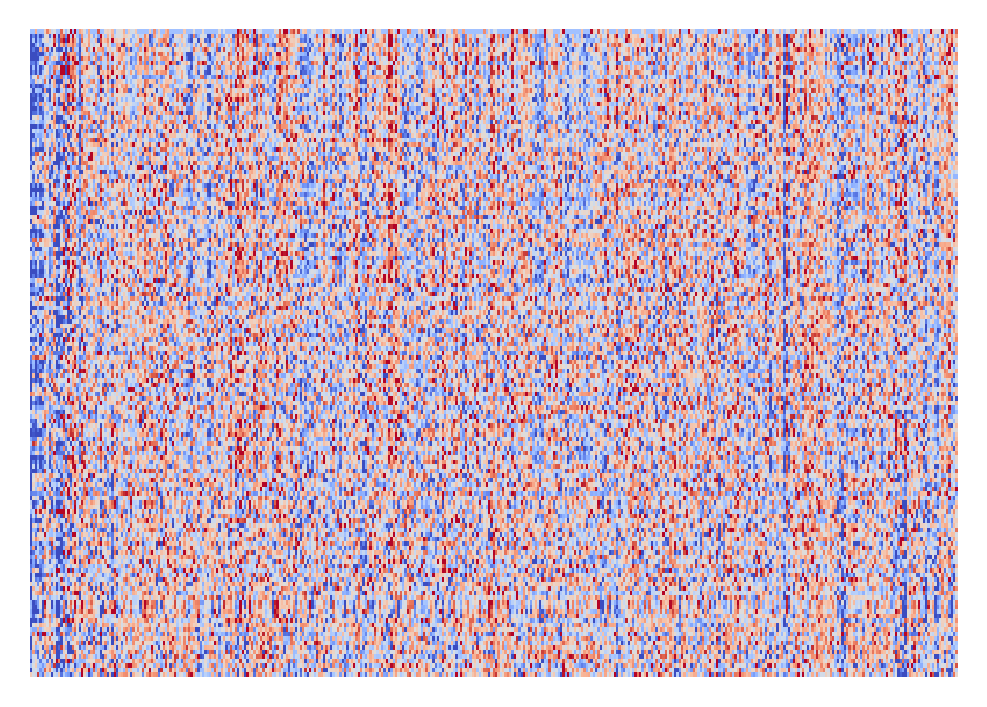

In [369]:
sns_df=exp_ov_ucec_order_dn.loc[order_dn,:]
n,w=sns_df.shape[0],sns_df.shape[1]
height=n/50
width=w/100
fig=plt.figure(figsize=(width,height))
ax=fig.add_subplot(111)
sns.heatmap(sns_df,vmin=-1.75,vmax=1.75,xticklabels=0, yticklabels=0,cmap='coolwarm',cbar=False,ax=ax)

<AxesSubplot:>

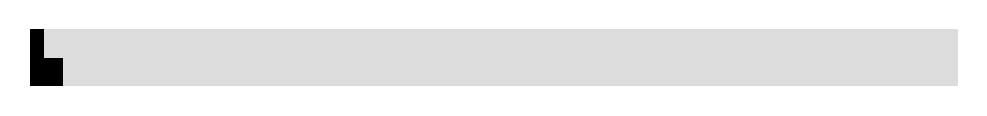

In [371]:
sns_df=pd.get_dummies(c_ucec[['C4','pC4']]).T
fig=plt.figure(figsize=(width,0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df,vmin=-0.3,vmax=1,xticklabels=0, yticklabels=0,cmap='Greys',cbar=False,ax=ax)

In [290]:
dummies=pd.get_dummies(c_ucec[['anno']],prefix='',prefix_sep='')
dummies=dummies.loc[:,['OV-C4','OV-pC4', 'UT-C4', 'UT-pC4', 'OV-nC4',  'UT-nC4']]

<AxesSubplot:>

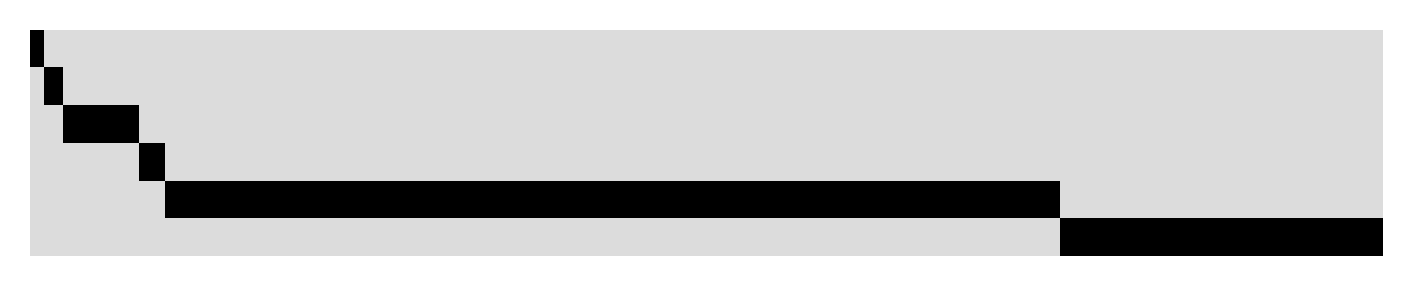

In [291]:
sns_df=dummies.T
fig=plt.figure(figsize=(width,1))
ax=fig.add_subplot(111)
sns.heatmap(sns_df,vmin=-0.3,vmax=1,xticklabels=0, yticklabels=0,cmap='Greys',cbar=False,ax=ax)

<AxesSubplot:>

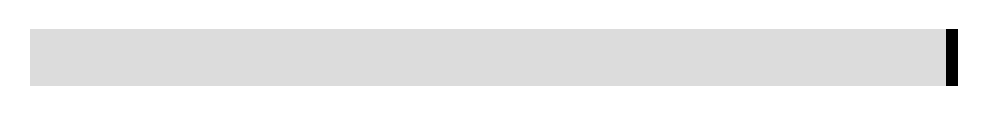

In [104]:
sns_df=c_tcga_order[['C4']].T
fig=plt.figure(figsize=(width,0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df,vmin=-0.3,vmax=1,xticklabels=0, yticklabels=0,cmap='Greys',cbar=False,ax=ax)

In [105]:
exp_tcga_order_up2=exp_tcga_order_z.reindex(index=list(u1))
exp_tcga_order_dn2=exp_tcga_order_z.reindex(index=list(d1))
exp_tcga_order_ud=exp_tcga_order_z.reindex(index=list(u1)+list(d1))


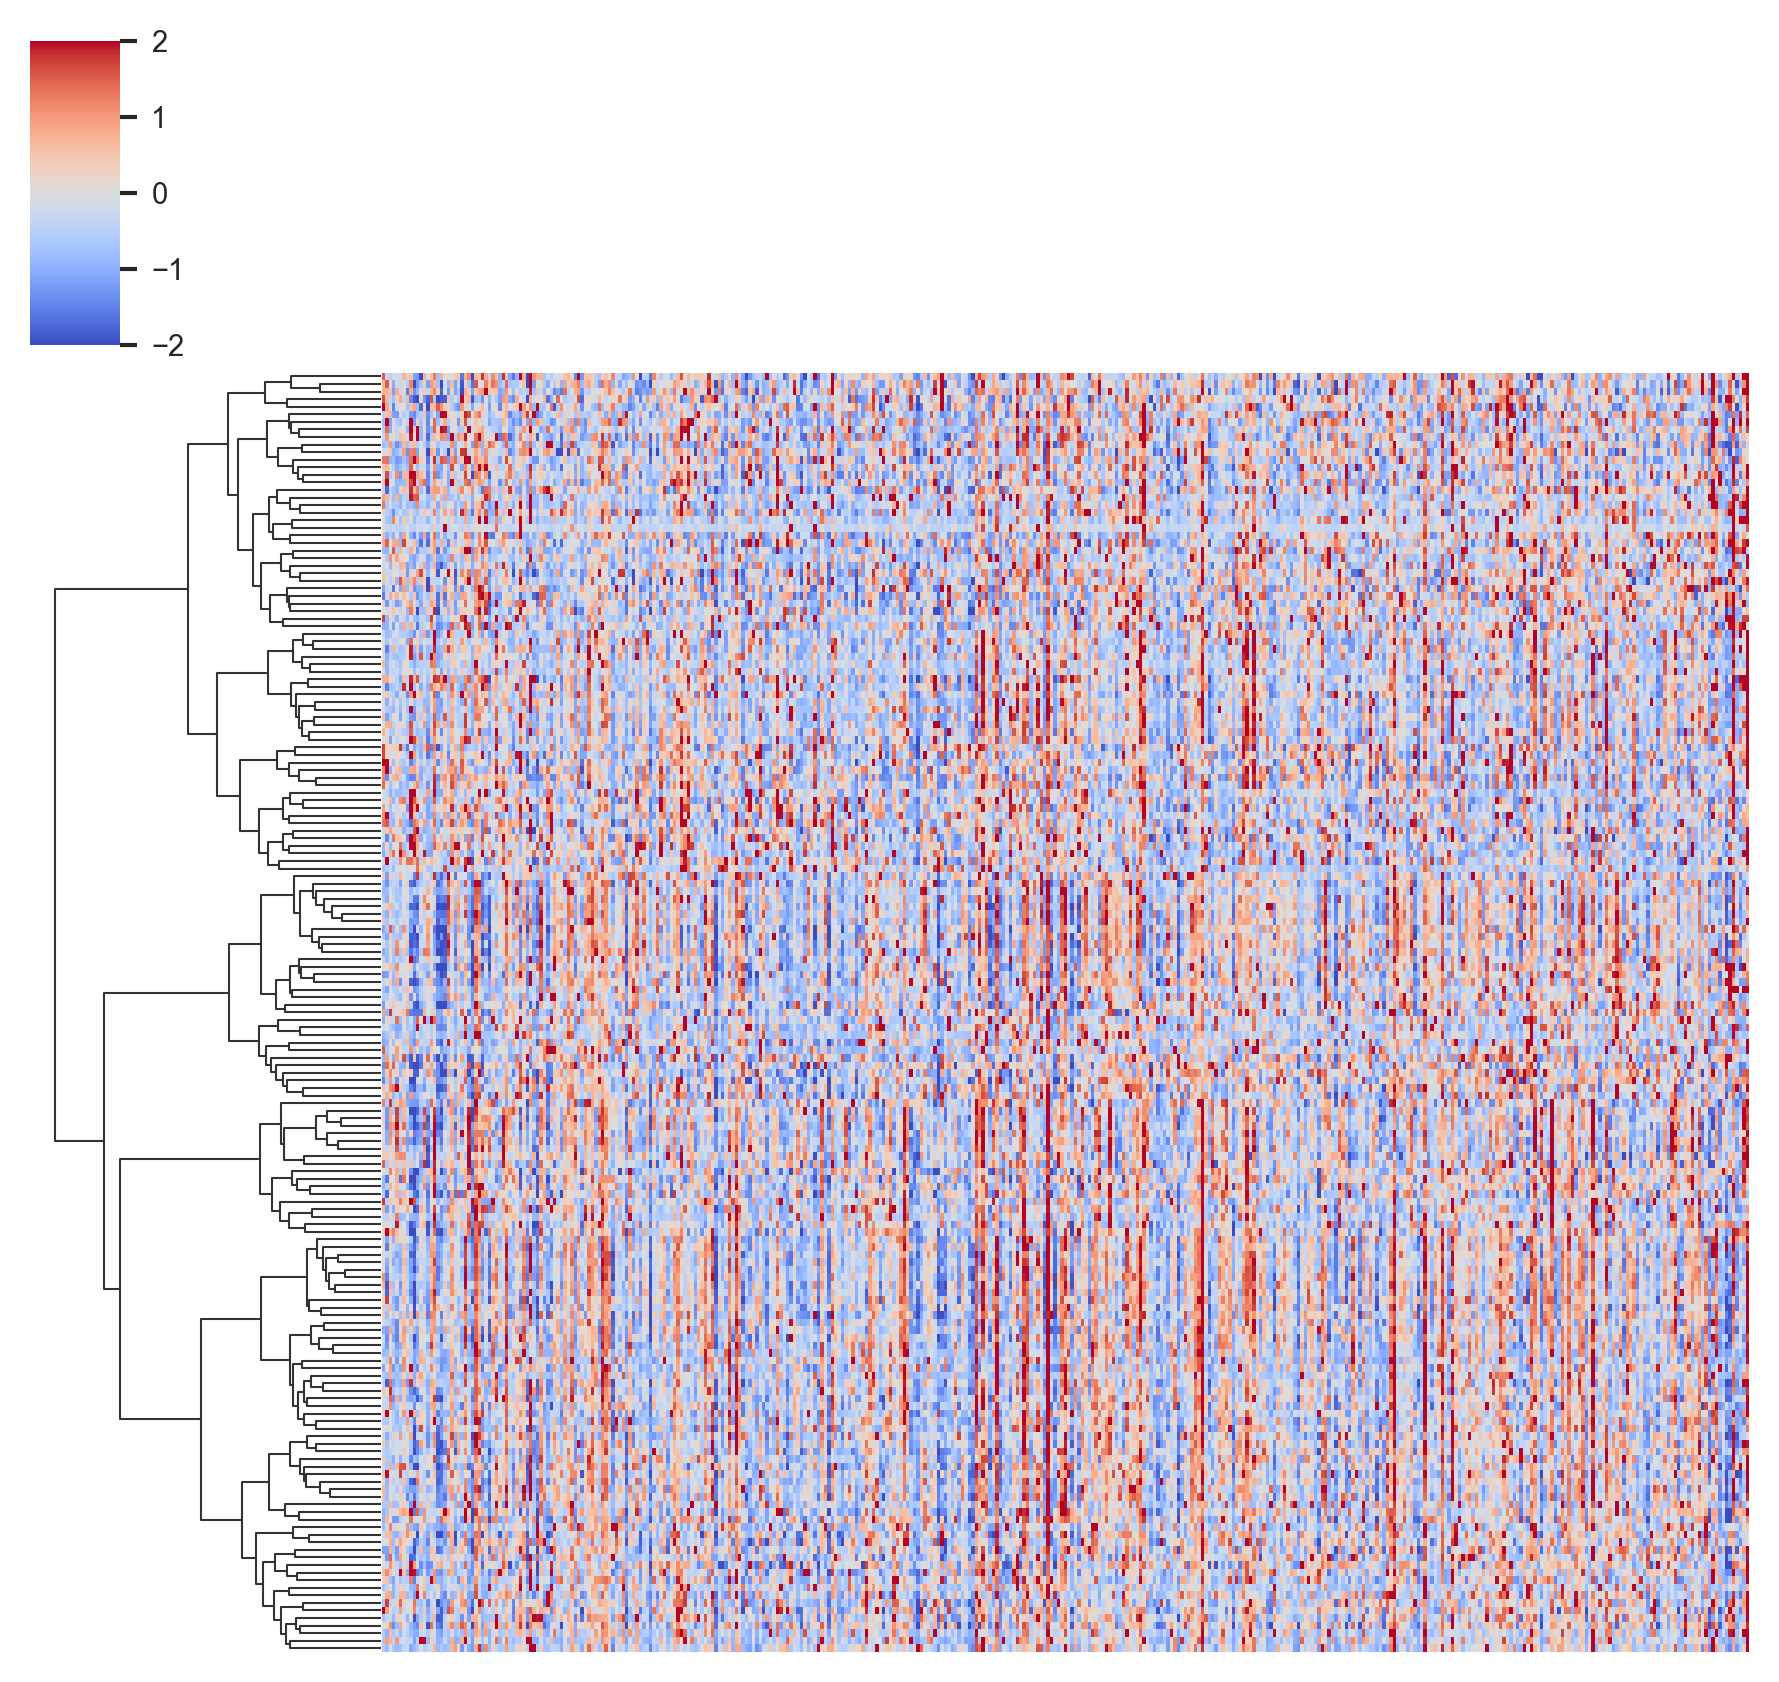

In [106]:
sns_df=exp_tcga_order_up2.dropna()
n=sns_df.shape[0]
height=n/30
sns.clustermap(sns_df,col_cluster=False,method='ward',cmap='coolwarm',vmin=-2,vmax=2,figsize=(6,height),
              xticklabels=0, yticklabels=0,)

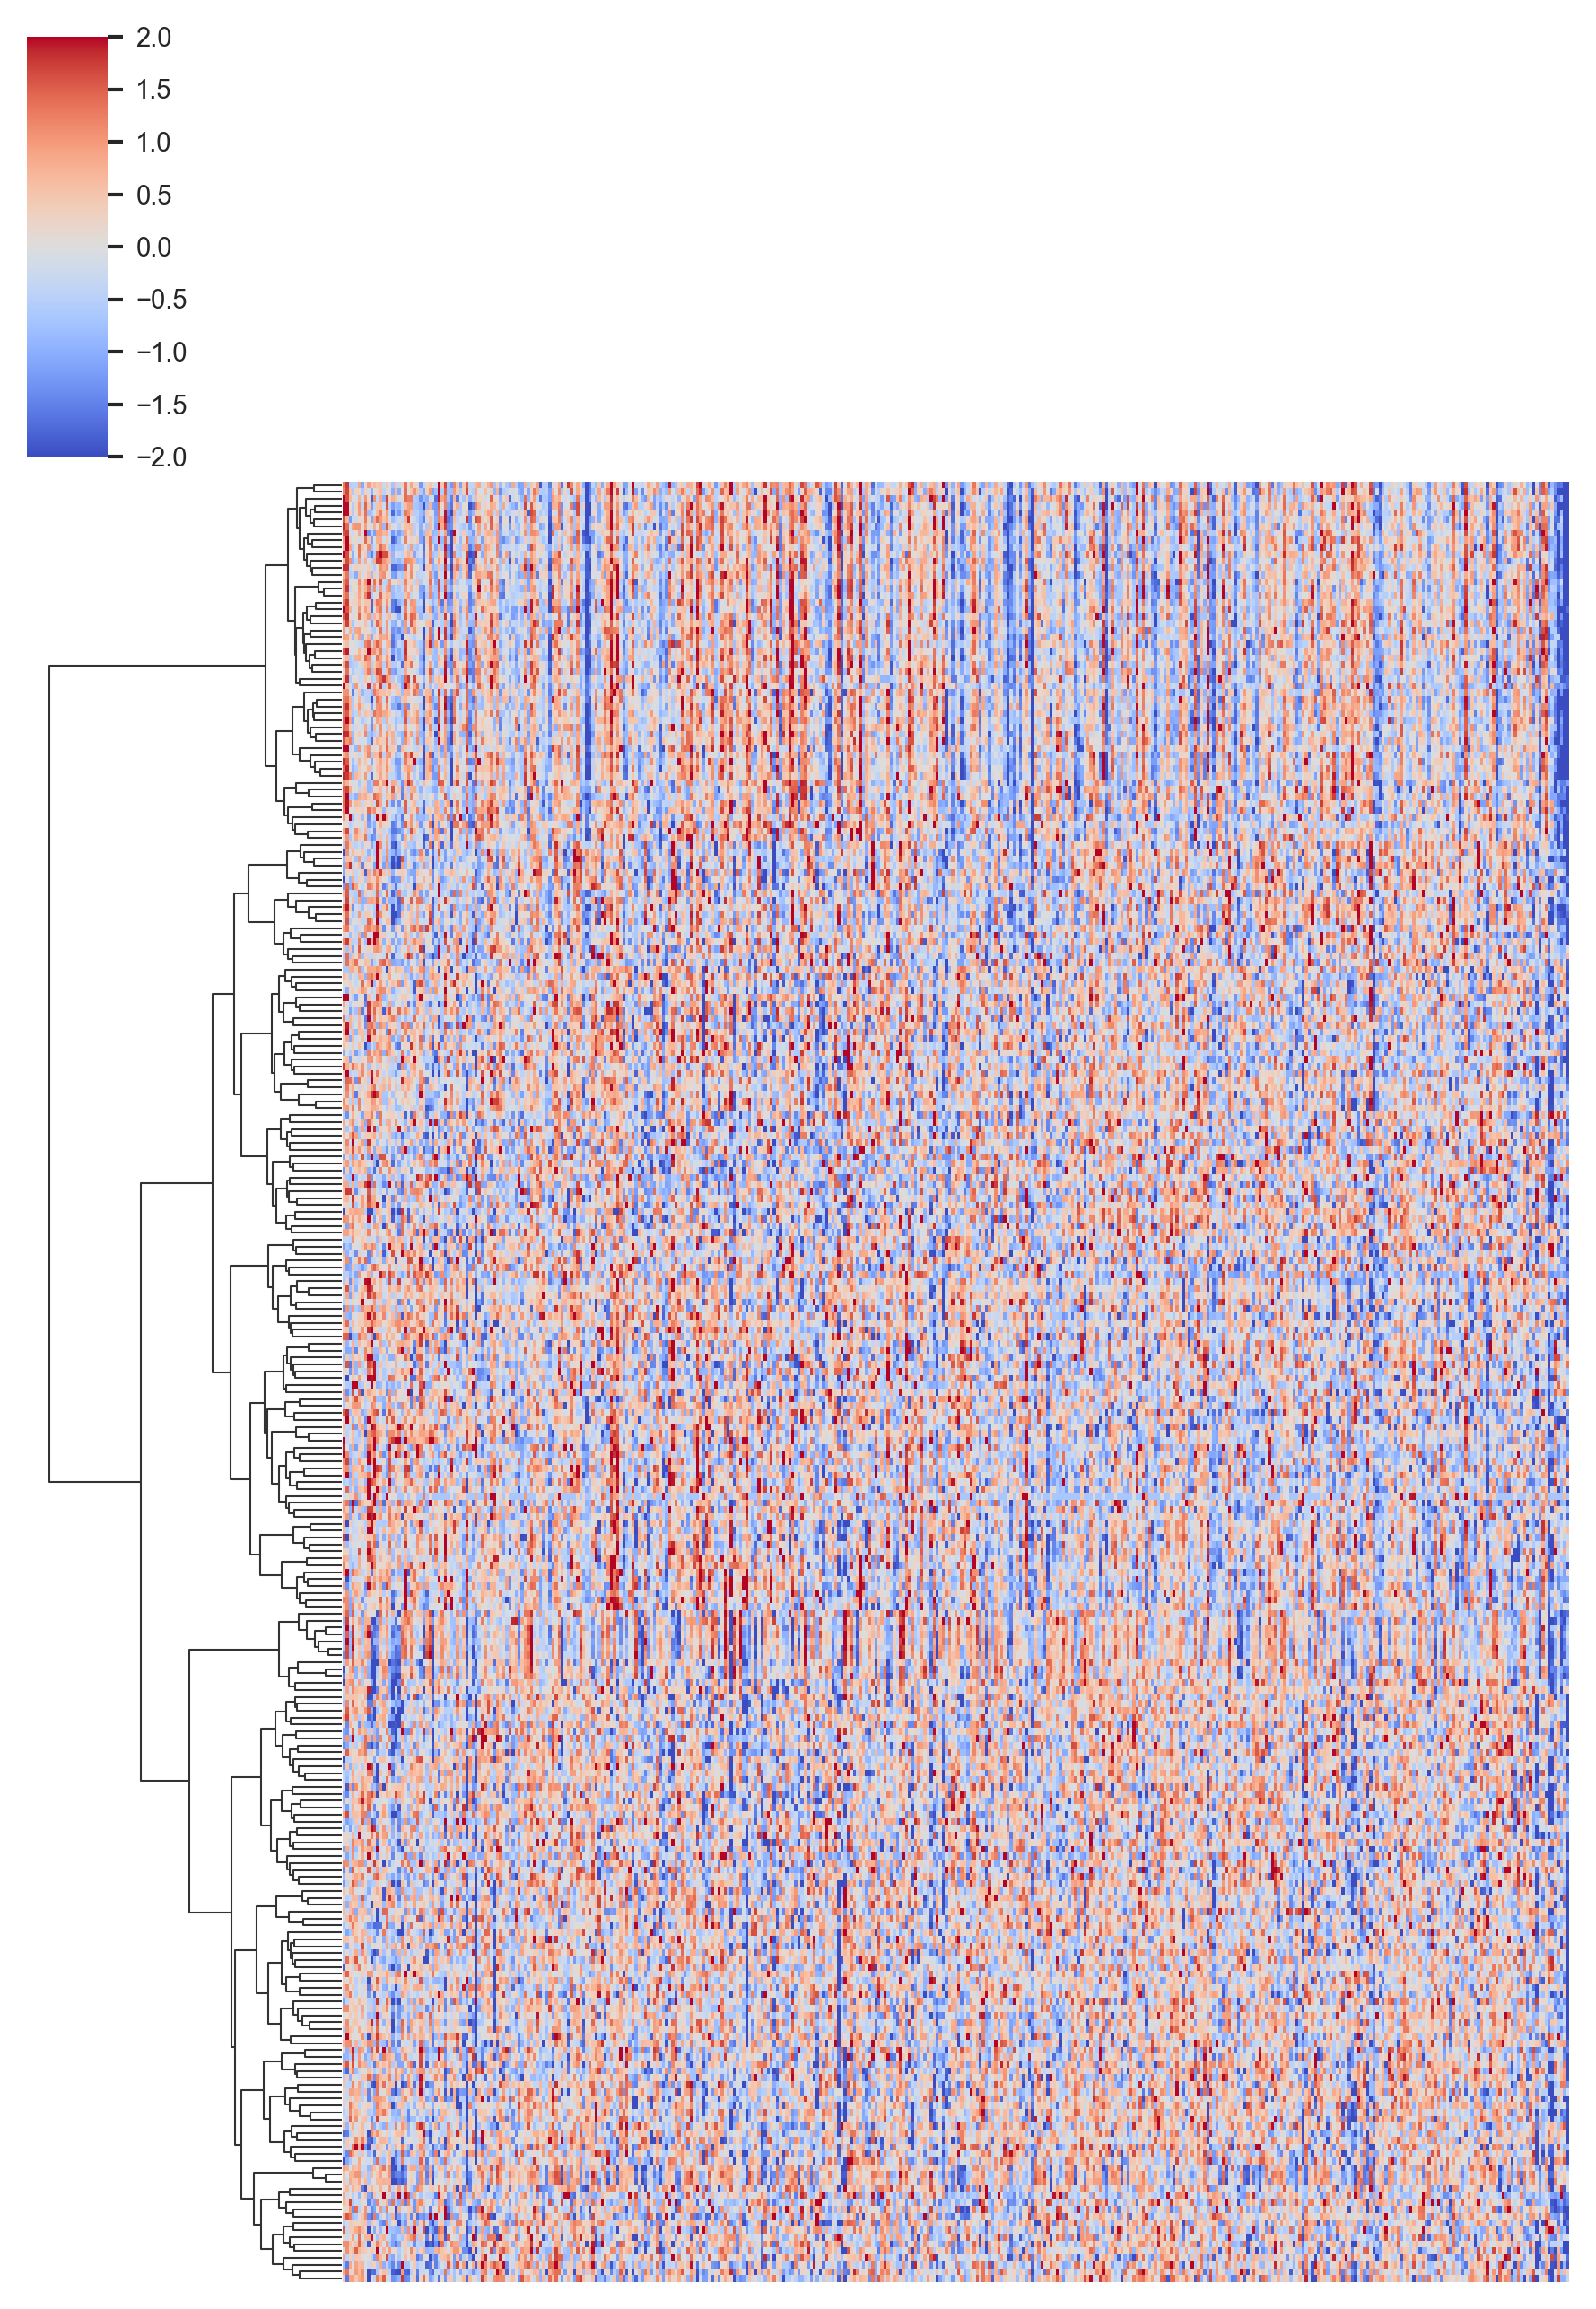

In [107]:
sns_df=exp_tcga_order_dn2.dropna()
n=sns_df.shape[0]
height=n/30
sns.clustermap(sns_df,col_cluster=False,method='ward',cmap='coolwarm',vmin=-2,vmax=2,figsize=(6,height),
              xticklabels=0, yticklabels=0,)

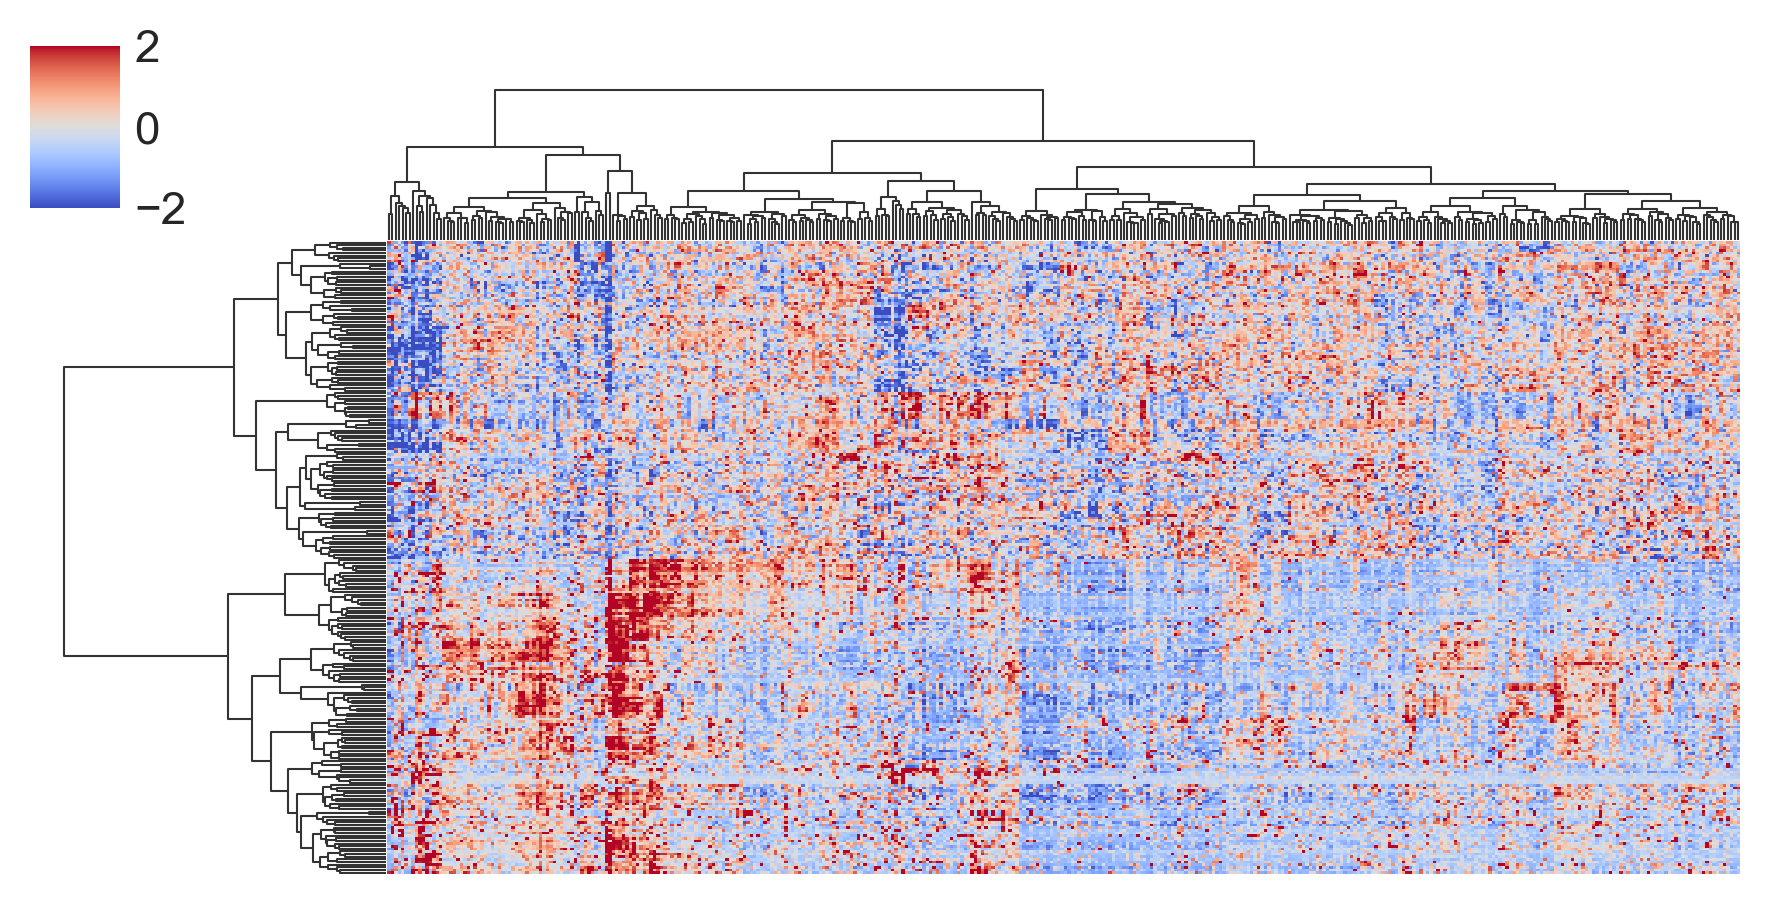

In [122]:
sns_df=exp_tcga_order_ud.dropna()

g=sns.clustermap(sns_df,
               method='ward',cmap='coolwarm',vmin=-2,vmax=2,figsize=(6,3),
              xticklabels=0, yticklabels=0,)

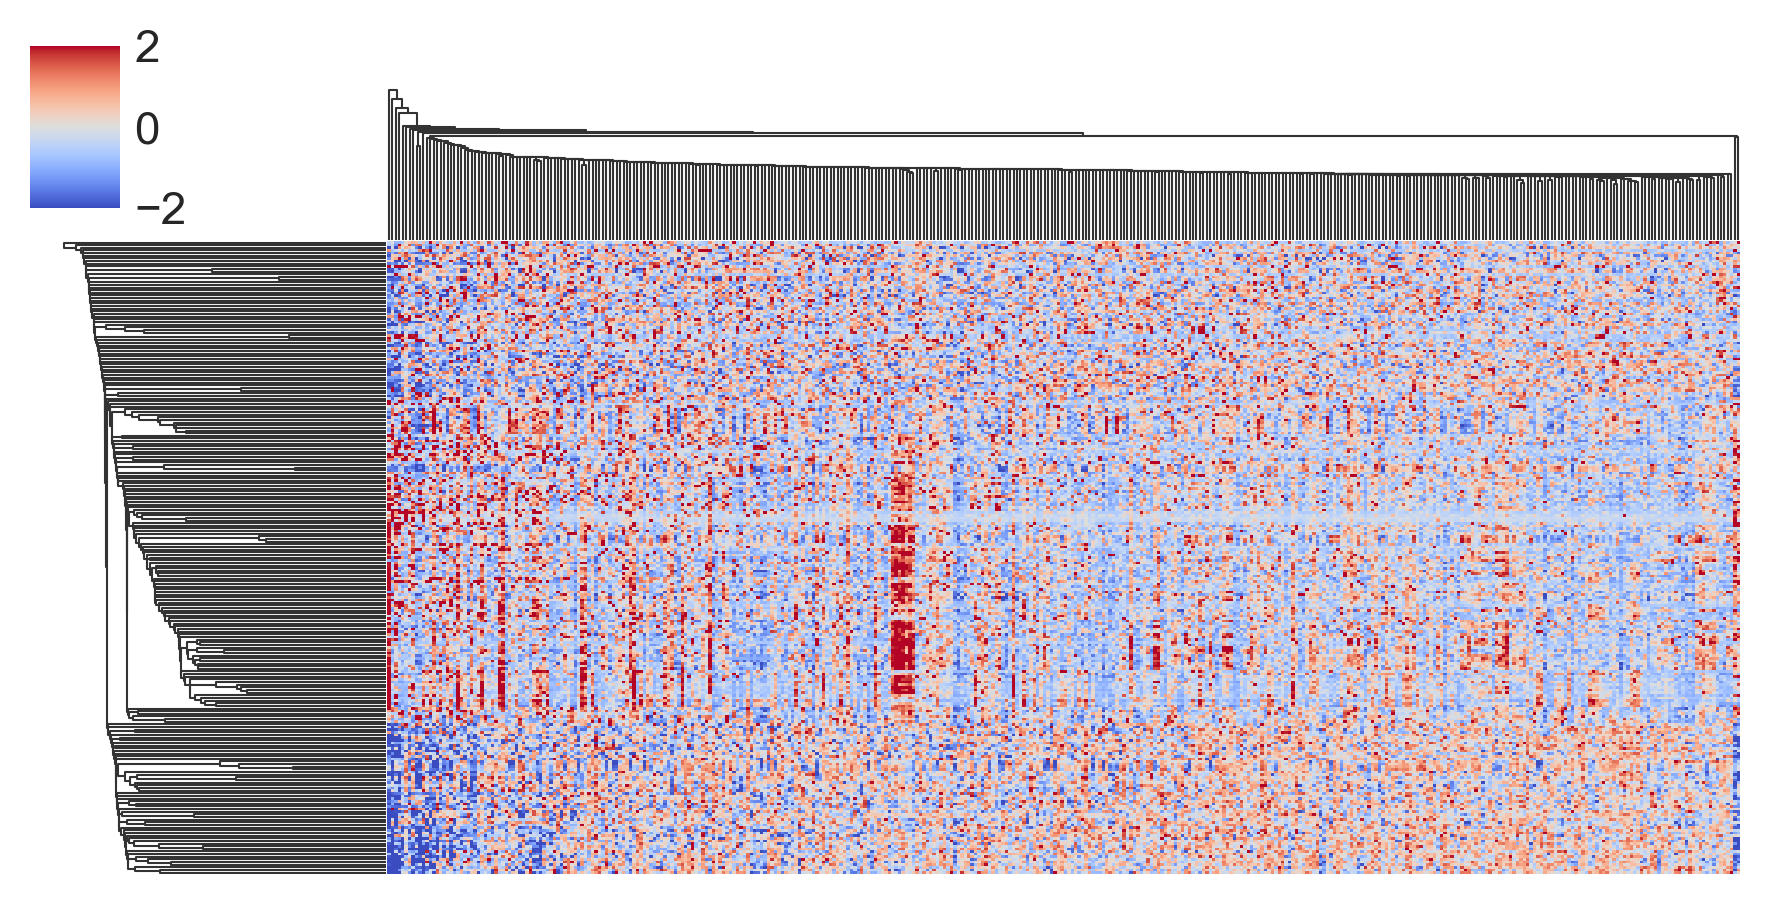

In [134]:
sns_df=exp_tcga_order_ud.dropna()

g=sns.clustermap(sns_df,
               method='single',cmap='coolwarm',vmin=-2,vmax=2,figsize=(6,3),
              xticklabels=0, yticklabels=0,)

In [135]:
sample_order=g.data2d.columns
c_tcga_new_order=c_tcga_order.loc[sample_order,:]
#c_tcga_new_order

<AxesSubplot:>

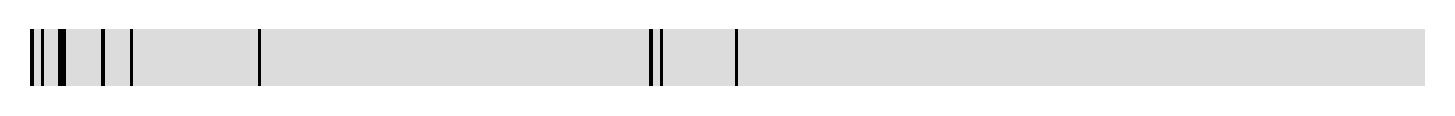

In [136]:
sns_df=c_tcga_new_order[['P3']].T
fig=plt.figure(figsize=(6,0.25))
ax=fig.add_subplot(111)
sns.heatmap(sns_df,vmin=-0.3,vmax=1,xticklabels=0, yticklabels=0,cmap='Greys',cbar=False,ax=ax)

In [194]:
newline=''

gmt_name='JGOG_c4_common_'+str(q_lim)+'_'+str(lfc_lim)+'_UP'
genes=list(u1&u2)
newline+=gmt_name+"\t"+gmt_name+"\t"+"\t".join(genes)+'\n'
with open('DEGs/JGOG_c4_common_'+str(q_lim)+'_'+str(lfc_lim)+'_UP'+'.txt','w') as fw:
    fw.write('\n'.join(genes))

gmt_name='JGOG_c4_common_'+str(q_lim)+'_'+str(lfc_lim)+'_DN'
genes=list(d1&d2)
newline+=gmt_name+"\t"+gmt_name+"\t"+"\t".join(genes)+'\n'
with open('DEGs/JGOG_c4_common_'+str(q_lim)+'_'+str(lfc_lim)+'_DN'+'.txt','w') as fw:
    fw.write('\n'.join(genes))


gmt_name='JGOG_c4_limma_'+str(q_lim)+'_'+str(lfc_lim)+'_UP'
genes=list(u4)
newline+=gmt_name+"\t"+gmt_name+"\t"+"\t".join(genes)+'\n'
with open('DEGs/JGOG_c4_limma_'+str(q_lim)+'_'+str(lfc_lim)+'_UP'+'.txt','w') as fw:
    fw.write('\n'.join(genes))

gmt_name='JGOG_c4_limma_'+str(q_lim)+'_'+str(lfc_lim)+'_DN'
genes=list(d4)
newline+=gmt_name+"\t"+gmt_name+"\t"+"\t".join(genes)+'\n'
with open('DEGs/JGOG_c4_limma_'+str(q_lim)+'_'+str(lfc_lim)+'_DN'+'.txt','w') as fw:
    fw.write('\n'.join(genes))


In [163]:
with open("DEGs/HGEOC_sig_"+str(q_lim)+'_'+str(lfc_lim)+".gmt","w") as fw:
    fw.write(newline)

In [155]:
u1=set( limma_up.index )
u2=set( deseq_up.index )
d1=set( limma_dn.index)
d2=set( deseq_dn.index )
u4=set( limma_up.index )
d4=set( limma_dn.index )

In [156]:
newline=''

gmt_name='JGOG_c4_common_'+str(q_lim)+'_'+str(lfc_lim)+'_UP'
genes=list(u1&u2)
newline+=gmt_name+"\t"+gmt_name+"\t"+"\t".join(genes)+'\n'
with open('DEGs/JGOG_c4_common_'+str(q_lim)+'_'+str(lfc_lim)+'_UP_ensg'+'.txt','w') as fw:
    fw.write('\n'.join(genes))

gmt_name='JGOG_c4_common_'+str(q_lim)+'_'+str(lfc_lim)+'_DN'
genes=list(d1&d2)
newline+=gmt_name+"\t"+gmt_name+"\t"+"\t".join(genes)+'\n'
with open('DEGs/JGOG_c4_common_'+str(q_lim)+'_'+str(lfc_lim)+'_DN_ensg'+'.txt','w') as fw:
    fw.write('\n'.join(genes))


gmt_name='JGOG_c4_limma_'+str(q_lim)+'_'+str(lfc_lim)+'_UP'
genes=list(u4)
newline+=gmt_name+"\t"+gmt_name+"\t"+"\t".join(genes)+'\n'
with open('DEGs/JGOG_c4_limma_'+str(q_lim)+'_'+str(lfc_lim)+'_UP_ensg'+'.txt','w') as fw:
    fw.write('\n'.join(genes))

gmt_name='JGOG_c4_limma_'+str(q_lim)+'_'+str(lfc_lim)+'_DN'
genes=list(d4)
newline+=gmt_name+"\t"+gmt_name+"\t"+"\t".join(genes)+'\n'
with open('DEGs/JGOG_c4_limma_'+str(q_lim)+'_'+str(lfc_lim)+'_DN_ensg'+'.txt','w') as fw:
    fw.write('\n'.join(genes))


In [157]:
with open("DEGs/HGEOC_sig_"+str(q_lim)+'_'+str(lfc_lim)+"_ensg.gmt","w") as fw:
    fw.write(newline)